# <center> COLOR COMPRESSION</center>
- ##### Name: Lý Nhật Hào
- ##### MSSV: 21127041
- ##### Class: 21CLC04
Trong file.ipynb trên sẽ bao gồm:
- `source code` giải quyết yêu cầu đồ án 1 đó là cài đặt chương trình giảm số lượng màu cho ảnh sử dụng thuật toán [K-Means](https://en.wikipedia.org/wiki/K-means_clustering).
- `Chú thích` ý nghĩa cơ bản của những hàm được cài đặt cũng như một vài biến quan trọng được cài đặt trong file code.

##### <center> <font style="color:red"> ** Những chú thích, kết quả, phân tích, nhận xét và bàn luận chi tiết của đồ án trên sẽ được triển khai sâu hơn trong file .PDF **</font><center>

### Khai Báo Thư Viện cần thiết được cho phép:

- `NumPy` (tính toán ma trận)
- `PIL` (đọc, ghi ảnh)
- `matplotlib` (hiển thị ảnh)
- `time` (đo thời gian thực hiện)




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import time
from PIL import Image

### -- Lớp <font style="color:red"> **KMEANS**</font>  -- 
Được sử dụng để thực hiện phân cụm dữ liệu bằng thuật toán K-means. Lớp này bao gồm các phương thức sau:
 
 * `__init__(self, kcluster_n, i_max=999, i_rand=999)`: Phương thức khởi tạo cho lớp, trong đó kcluster_n là số lượng cụm (clusters) cần phân chia, i_max là số lần lặp tối đa, và i_rand là hạt giống ngẫu nhiên.

 * `cen_ran(self, X)`: Phương thức khởi tạo các trung tâm cụm (centroids) ban đầu ngẫu nhiên từ tập dữ liệu đầu vào X. Cụ thể:
   

* `nearing_k(self, X, centr)`: Hàm này được sử dụng để phân cụm các điểm dữ liệu trong ma trận X vào các cụm tương ứng dựa trên khoảng cách giữa các điểm dữ liệu và các trung tâm cụm trong ma trận centr.

* `centr_mean(self, X, idx)`: Phương thức tính toán lại trung tâm cụm dựa trên các điểm dữ liệu được gán vào từng cụm.

* `warning_compute(self, X, idx, centr)`: Phương thức tính toán tổng bình phương khoảng cách giữa các điểm dữ liệu và trung tâm cụm hiện tại.

* `solving(self, X)`: Phương thức thực hiện thuật toán phân cụm K-means bằng cách lặp lại các bước nearing_k và centr_mean cho đến khi trung tâm cụm không thay đổi nữa hoặc đã đạt đến số lần lặp tối đa.

* `predict(self, X)`: Phương thức dự đoán cụm cho các điểm dữ liệu mới bằng cách sử dụng các trung tâm cụm đã được học.

In [2]:

class Kmeans:
    #Khởi tạo Class
    def __init__(init, kcluster_n, i_max=999, i_rand=999):
        init.kcluster_n = kcluster_n
        init.i_max = i_max
        init.i_rand = i_rand
        
    #  Khởi tạo Centroid
    def cen_ran(init, X):
        np.random.RandomState(init.i_rand)
        rand_idx = np.random.permutation(X.shape[0])
        centr = X[rand_idx[:init.kcluster_n]]
        return centr
    
    # Phân Cụm
    def nearing_k(init, X, centr):
        distance_k = np.zeros((X.shape[0], init.kcluster_n))
        for index in range(init.kcluster_n):
            distance_k[:,index] = np.square(np.linalg.norm(X - centr[index, :], axis=1))
        return np.argmin(distance_k, axis=1)
    
    # Tính Toán lại center cụm
    def centr_mean(init, X, idx):
        centr = np.zeros((init.kcluster_n, X.shape[1]))
        for index in range(init.kcluster_n):
            centr[index, :] = np.mean(X[index == idx, :], axis=0)
        return centr
    
    def warning_compute(init, X,idx, centr):
        distance = np.zeros(X.shape[0])
        for index in range(init.kcluster_n):
            distance[index == idx] = np.linalg.norm(X[index == idx] - centr[index], axis=1)
        return np.sum(np.square(distance))
    
    # Lặp... Phân cụm đến hết
    def solving(init, X):
        init.centr = init.cen_ran(X)
        for i in range(init.i_rand):
            previous_centoids = init.centr
            init.idx = init.nearing_k(X, previous_centoids)
            init.centr = init.centr_mean(X, init.idx)
            if np.all(init.centr == previous_centoids):
                break
        init.error = init.warning_compute(X,init.idx,init.centr)
        
    # dự đoán
    def predict(init, X):
        return init.nearing_k(X, init.centr)
    


### Hàm <font style="color:red"> **Formating**</font> 
Được sử dụng để giúp người dùng lựa chọn kiểu file output sau khi tấm ảnh được compress với 3 format như sau:
- file`.jpg`
- file`.png`
- file`.pdf` 

In [3]:
def Formating():
    print('**************************** CHOICE OF FILE.OUT FORMAT *********************************')
    print('Enter 1 : Output as JPG file')
    print('Enter 2 : Output as PNG file')
    print('Enter 3 : Output as PDF file')
    print('****************************************************************************************')
    decision = int(input('Enter your choice: '))
    if (decision == 1):
        return '.jpg'
    if (decision == 2):
        return '.png'
    if (decision == 3):
        return '.pdf'

### Hàm <font style="color:red"> **kcluster3(value)**</font> 
Được sử dụng để nén một bức ảnh thành chỉ 3 màu sắc bằng cách sử dụng thuật toán phân cụm <font style="color:red"> **K-means**</font>. Hàm này thực hiện các bước sau:

- Mở bức ảnh và chuyển đổi sang mảng numpy sử dụng `np.asarray`.
- Sử dụng `reshape` để chuyển đổi mảng 2D thành mảng 1D.
- Khởi tạo một đối tượng Kmeans với `kcluster_n=3` và giải quyết bằng cách sử dụng `solving`.
- Gán nhãn cho từng điểm dữ liệu trong tập dữ liệu đầu vào sử dụng phương thức `idx` của <font style="color:red">**class Kmeans**</font>.
- Tạo một mảng 2D mới bằng cách lấy giá trị trung tâm cụm của mỗi điểm được gán nhãn. Mảng này sẽ được sử dụng để hiển thị bức ảnh đã nén với chỉ ba màu sắc.
- Chuyển đổi định dạng của `mảng numpy` thành đối tượng hình ảnh Image và lưu lại bức ảnh nén với 3 màu sắc.
- Sau khi thực hiện xong, hàm sẽ trả về một bức ảnh đã nén với chỉ 3 màu sắc và hiển thị bức ảnh gốc cùng với bức ảnh đã nén bằng `matplotlib`.

In [4]:
def kcluster3(value, choice):
    start_time = time.time()
    picture = Image.open(value)
    picture = np.asarray(picture)
    X = picture.reshape(picture.shape[0] * picture.shape[1], picture.shape[2])
    kmeans_compressed = Kmeans(kcluster_n=3)
    kmeans_compressed.solving(X)
    picture_kcluster = np.array([list(kmeans_compressed.centr[id]) for id in kmeans_compressed.idx])
    picture_kcluster = picture_kcluster.astype("uint8")
    picture_kcluster = picture_kcluster.reshape(picture.shape[0], picture.shape[1], picture.shape[2])
    fig, ax = plt.subplots(1, 2, figsize = (10,6))
    ax[0].imshow(picture)
    ax[0].set_title('PICTURE WITHOUT COMPRESSED')
    ax[1].imshow(picture_kcluster)
    ax[1].set_title('3 COLOR COMPRESSED')
    for ax in fig.axes:
        ax.axis('on')
    plt.tight_layout()
    compressed_img = Image.fromarray(picture_kcluster)
    compressed_img.save("compressed3"+choice) 
    end_time = time.time()
    print('Your picture ',value,' has been compressed as', choice,' file with 3 color and it took ',end_time-start_time,'s')
 


### Hàm <font style="color:red"> **kcluster5(value)**</font> 
Được sử dụng để nén một bức ảnh thành chỉ 5 màu sắc bằng cách sử dụng thuật toán phân cụm <font style="color:red"> **K-means**</font>. Hàm này thực hiện các bước sau:

- Mở bức ảnh và chuyển đổi sang mảng numpy sử dụng `np.asarray`.
- Sử dụng `reshape` để chuyển đổi mảng 2D thành mảng 1D.
- Khởi tạo một đối tượng Kmeans với `kcluster_n=5` và giải quyết bằng cách sử dụng `solving`.
- Gán nhãn cho từng điểm dữ liệu trong tập dữ liệu đầu vào sử dụng phương thức `idx` của <font style="color:red">**class Kmeans**</font>.
- Tạo một mảng 2D mới bằng cách lấy giá trị trung tâm cụm của mỗi điểm được gán nhãn. Mảng này sẽ được sử dụng để hiển thị bức ảnh đã nén với chỉ ba màu sắc.
- Chuyển đổi định dạng của `mảng numpy` thành đối tượng hình ảnh Image và lưu lại bức ảnh nén với 5 màu sắc.
- Sau khi thực hiện xong, hàm sẽ trả về một bức ảnh đã nén với chỉ 5 màu sắc và hiển thị bức ảnh gốc cùng với bức ảnh đã nén bằng `matplotlib`.

In [5]:

def kcluster5(value,choice):
    start_time = time.time()
    picture = Image.open(value)
    picture = np.asarray(picture)
    X = picture.reshape(picture.shape[0] * picture.shape[1], picture.shape[2])
    kmeans_compressed = Kmeans(kcluster_n=5)
    kmeans_compressed.solving(X)
    picture_kcluster = np.array([list(kmeans_compressed.centr[id]) for id in kmeans_compressed.idx])
    picture_kcluster = picture_kcluster.astype("uint8")
    picture_kcluster = picture_kcluster.reshape(picture.shape[0], picture.shape[1], picture.shape[2])
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture)
    ax[0].set_title('PICTURE WITHOUT COMPRESSED')
    ax[1].imshow(picture_kcluster)
    ax[1].set_title('5 COLOR COMPRESSED')
    for ax in fig.axes:
        ax.axis('on')
    plt.tight_layout()
    compressed_img = Image.fromarray(picture_kcluster)
    compressed_img.save("compressed5"+choice) 
    end_time = time.time()
    print('Your picture ',value,' has been compressed as', choice,' file with 5 color and it took ',end_time-start_time,'s')


### Hàm <font style="color:red"> **kcluster7(value)**</font> 
Được sử dụng để nén một bức ảnh thành chỉ 7 màu sắc bằng cách sử dụng thuật toán phân cụm <font style="color:red"> **K-means**</font>. Hàm này thực hiện các bước sau:

- Mở bức ảnh và chuyển đổi sang mảng numpy sử dụng `np.asarray`.
- Sử dụng `reshape` để chuyển đổi mảng 2D thành mảng 1D.
- Khởi tạo một đối tượng Kmeans với `kcluster_n=7` và giải quyết bằng cách sử dụng `solving`.
- Gán nhãn cho từng điểm dữ liệu trong tập dữ liệu đầu vào sử dụng phương thức `idx` của <font style="color:red">**class Kmeans**</font>.
- Tạo một mảng 2D mới bằng cách lấy giá trị trung tâm cụm của mỗi điểm được gán nhãn. Mảng này sẽ được sử dụng để hiển thị bức ảnh đã nén với chỉ ba màu sắc.
- Chuyển đổi định dạng của `mảng numpy` thành đối tượng hình ảnh Image và lưu lại bức ảnh nén với 7 màu sắc.
- Sau khi thực hiện xong, hàm sẽ trả về một bức ảnh đã nén với chỉ 7 màu sắc và hiển thị bức ảnh gốc cùng với bức ảnh đã nén bằng `matplotlib`.

In [6]:
def kcluster7(value,choice):
    start_time = time.time()
    picture = Image.open(value)
    picture = np.asarray(picture)
    X = picture.reshape(picture.shape[0] * picture.shape[1], picture.shape[2])
    kmeans_compressed = Kmeans(kcluster_n=7)
    kmeans_compressed.solving(X)
    picture_kcluster = np.array([list(kmeans_compressed.centr[id]) for id in kmeans_compressed.idx])
    picture_kcluster = picture_kcluster.astype("uint8")
    picture_kcluster = picture_kcluster.reshape(picture.shape[0], picture.shape[1], picture.shape[2])
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture)
    ax[0].set_title('PICTURE WITHOUT COMPRESSED')
    ax[1].imshow(picture_kcluster)
    ax[1].set_title('7 COLOR COMPRESSED')
    for ax in fig.axes:
        ax.axis('on')
    plt.tight_layout()
    compressed_img = Image.fromarray(picture_kcluster)
    compressed_img.save("compressed7"+choice)
    end_time = time.time()
    print('Your picture ',value,' has been compressed as', choice,' file with 7 color and it took ',end_time-start_time,'s')


### Hàm <font style="color:red"> **kcluster9(value)**</font> 
Được sử dụng để nén một bức ảnh thành chỉ 9 màu sắc bằng cách sử dụng thuật toán phân cụm <font style="color:red"> **K-means**</font>. Hàm này thực hiện các bước sau:

- Mở bức ảnh và chuyển đổi sang mảng numpy sử dụng `np.asarray`.
- Sử dụng `reshape` để chuyển đổi mảng 2D thành mảng 1D.
- Khởi tạo một đối tượng Kmeans với `kcluster_n=9` và giải quyết bằng cách sử dụng `solving`.
- Gán nhãn cho từng điểm dữ liệu trong tập dữ liệu đầu vào sử dụng phương thức `idx` của <font style="color:red">**class Kmeans**</font>.
- Tạo một mảng 2D mới bằng cách lấy giá trị trung tâm cụm của mỗi điểm được gán nhãn. Mảng này sẽ được sử dụng để hiển thị bức ảnh đã nén với chỉ ba màu sắc.
- Chuyển đổi định dạng của `mảng numpy` thành đối tượng hình ảnh Image và lưu lại bức ảnh nén với 9 màu sắc.
- Sau khi thực hiện xong, hàm sẽ trả về một bức ảnh đã nén với chỉ 9 màu sắc và hiển thị bức ảnh gốc cùng với bức ảnh đã nén bằng `matplotlib`.

In [7]:
def kcluster9(value, choice):
    start_time = time.time()
    picture = Image.open(value)
    picture = np.asarray(picture)
    X = picture.reshape(picture.shape[0] * picture.shape[1], picture.shape[2])
    kmeans_compressed = Kmeans(kcluster_n=9)
    kmeans_compressed.solving(X)
    picture_kcluster = np.array([list(kmeans_compressed.centr[id]) for id in kmeans_compressed.idx])
    picture_kcluster = picture_kcluster.astype("uint8")
    picture_kcluster = picture_kcluster.reshape(picture.shape[0], picture.shape[1], picture.shape[2])
    fig, ax = plt.subplots(1, 2, figsize = (10, 6))
    ax[0].imshow(picture)
    ax[0].set_title('PICTURE WITHOUT COMPRESSED')
    ax[1].imshow(picture_kcluster)
    ax[1].set_title('9 COLOR COMPRESSED')
    for ax in fig.axes:
        ax.axis('on')
    plt.tight_layout()
    compressed_img = Image.fromarray(picture_kcluster)
    compressed_img.save("compressed9" + choice )
    end_time = time.time()
    print('Your picture ',value,' has been compressed as', choice,' file with 9 color and it took ',end_time-start_time,'s')
   
    


### Hàm <font style="color:red"> **ENTER**</font> 
* Cho phép người dùng nhập vào tên bức ảnh cần được compress


In [8]:
def enter():
    value1= input('ENTER THE NAME OF PICTURE THAT YOU WANT TO COMPRESS: ') 
    print('Your name of picture is : ',value1)
    print(' ')
    return value1

### Hàm <font style="color:red"> **Main**</font> 
* Gọi hàm `ENTER()` cho phép người dùng nhập vào tên bức ảnh cần được compress
* Gọi hàm `Formating()` cho phép người dùng lựa chọn định dạng ảnh đầu ra bằng 3 định dạng:
    - file`.jpg`
    - file`.png`
    - file`.pdf` 

Gọi các hàm `kclusterN(value)` để compress ảnh theo số lượng màu yêu cầu

Enter the name of the picture that you want to compress!
Your name of picture is :  U.JPG
 
ENTER YOUR CHOICE OF OUTPUT FILE FORMAT
**************************** CHOICE OF FILE.OUT FORMAT *********************************
Enter 1 : Output as JPG file
Enter 2 : Output as PNG file
Enter 3 : Output as PDF file
****************************************************************************************
 
Your choice is :  .png
Your picture  U.JPG  has been compressed as .png  file with 3 color and it took  30.210423231124878 s
Your picture  U.JPG  has been compressed as .png  file with 5 color and it took  74.24867486953735 s
Your picture  U.JPG  has been compressed as .png  file with 7 color and it took  97.44512677192688 s
Your picture  U.JPG  has been compressed as .png  file with 9 color and it took  147.68542408943176 s


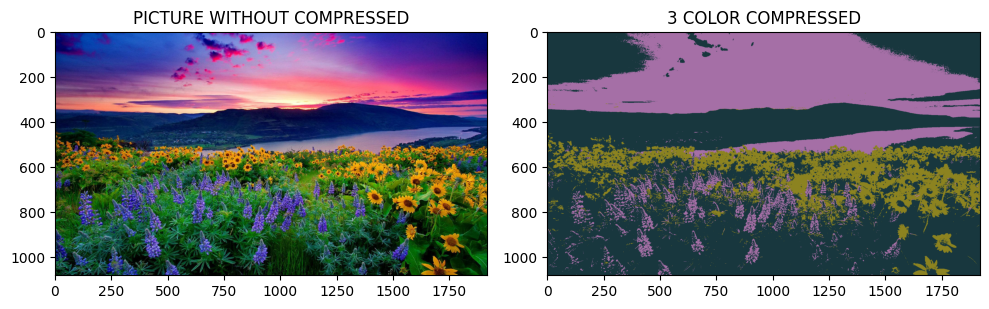

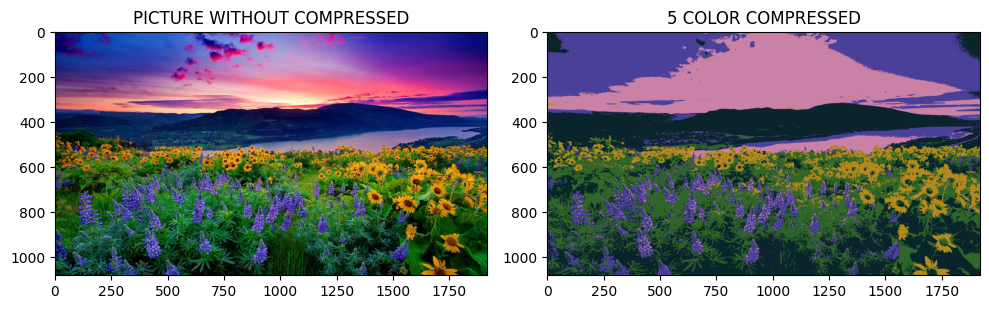

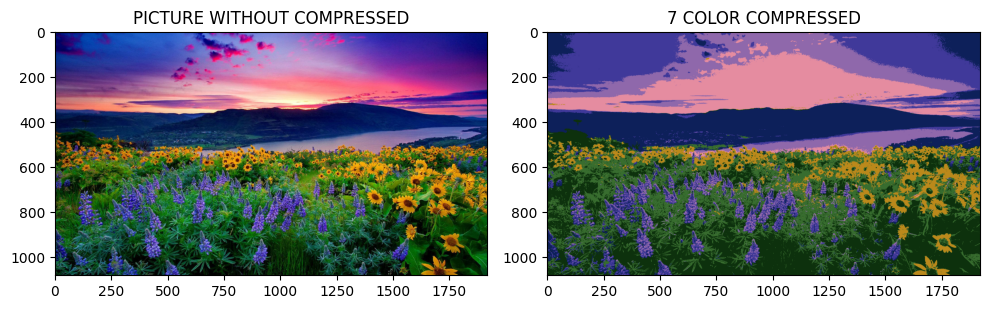

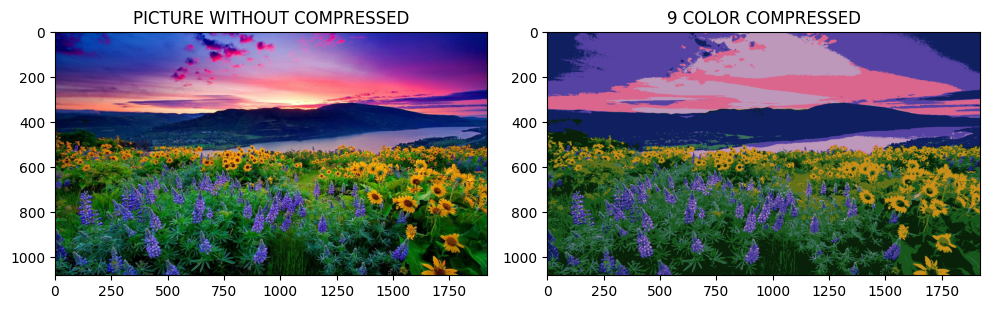

In [9]:
print('Enter the name of the picture that you want to compress!')
value=enter()

print('ENTER YOUR CHOICE OF OUTPUT FILE FORMAT')
choice = Formating()
print(' ')
print('Your choice is : ',choice)

kcluster3(value,choice)
kcluster5(value,choice)
kcluster7(value,choice)
kcluster9(value, choice)
